In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('../data/eps_quarter.csv')


In [3]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df.rename(columns={'date': 'Quarter', 'data': 'EPS'}, inplace=True)


In [5]:
df.head()

,Quarter,EPS
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [6]:
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.set_index('Quarter', inplace=True) #set date as index
df.head()

,EPS
Quarter,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


In [7]:
df.tail()

,EPS
Quarter,
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


<Axes: xlabel='Quarter'>

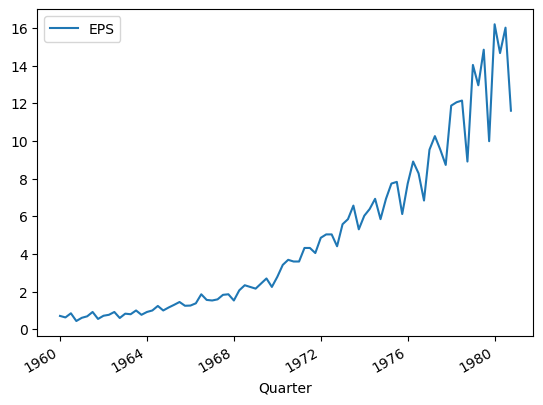

In [8]:
# # Time Plot
df.plot()

In [9]:
print(df.index.freq)


None


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
advanced_decomposition = STL(df.EPS, period=4).fit()


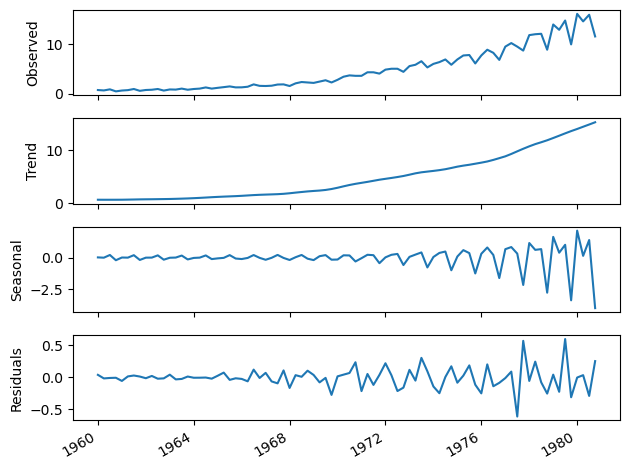

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()



# Split Data

In [12]:
train, test = df[:-4], df[-4:].copy()
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))


Observations: 84
Training Observations: 80
Testing Observations: 4


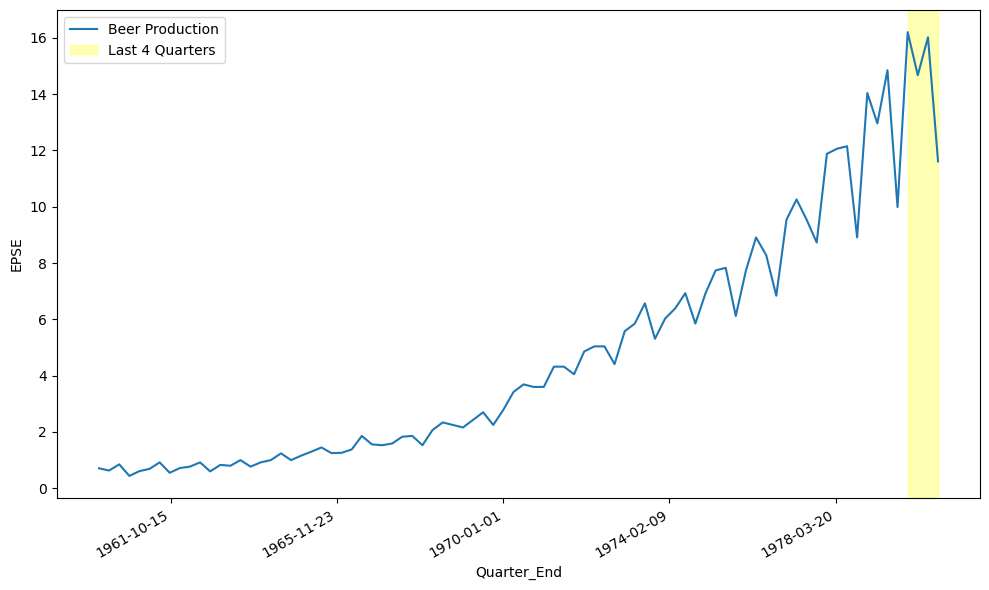

In [13]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(df.index, df['EPS'], label="Beer Production")
ax.set_xlabel('Quarter_End')
ax.set_ylabel('EPSE')

# Highlight the last four quarters
start_highlight = df.index[-4]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 4 Quarters")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

# Predict historical mean

In [14]:
historical_mean = np.mean(train['EPS'])
historical_mean

4.308499987499999

In [15]:
test.loc[:, 'pred_mean'] = historical_mean
test

,EPS,pred_mean
Quarter,,
1980-01-01,16.20,4.3085
1980-04-01,14.67,4.3085
1980-07-02,16.02,4.3085
1980-10-01,11.61,4.3085


In [16]:
#function to find MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
mape_hist_mean = mape(test['EPS'], test['pred_mean'])
mape_hist_mean

70.00752579965119

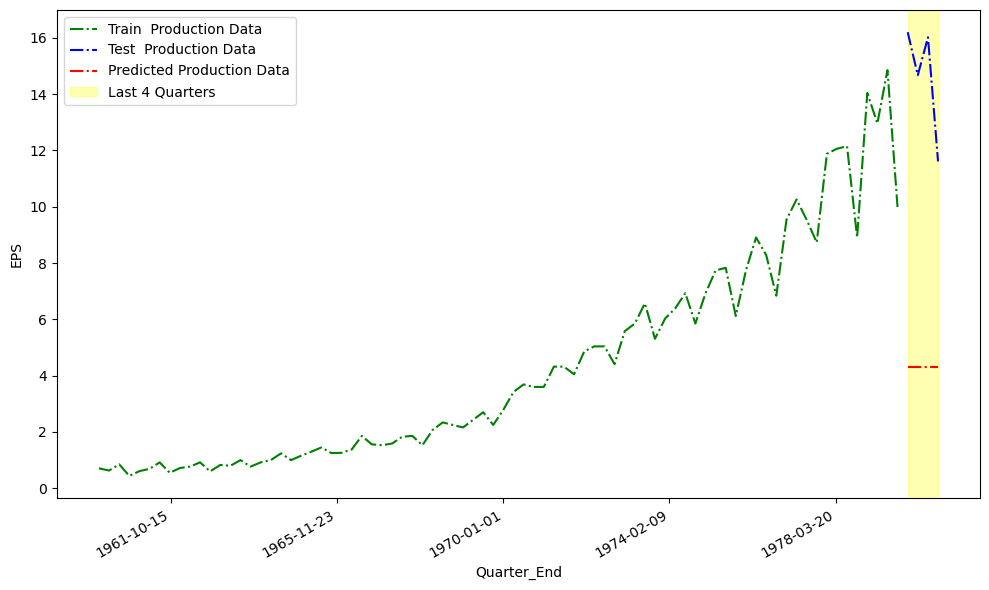

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(train.index, train['EPS'],'g-.', label="Train  Production Data")
ax.plot(test.index, test['EPS'],'b-.', label="Test  Production Data")
ax.plot(test.index, test['pred_mean'],'r-.', label="Predicted Production Data")

ax.set_xlabel('Quarter_End')
ax.set_ylabel('EPS')

# Highlight the last four quarters
start_highlight = df.index[-4]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 4 Quarters")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

# Predict last year mean

In [19]:
last_year_mean = np.mean(train['EPS'][-4:])
last_year_mean

12.96

In [20]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,EPS,pred_mean,pred__last_yr_mean
Quarter,,,
1980-01-01,16.20,4.3085,12.96
1980-04-01,14.67,4.3085,12.96
1980-07-02,16.02,4.3085,12.96
1980-10-01,11.61,4.3085,12.96


In [21]:
mape_last_year_mean = mape(test['EPS'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

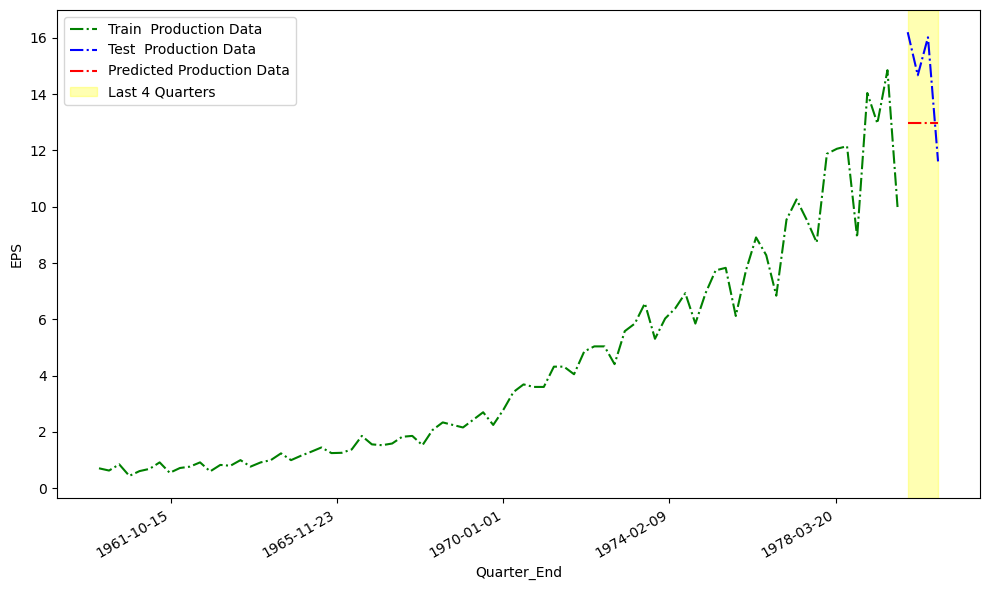

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['EPS'],'g-.', label="Train  Production Data")
ax.plot(test.index, test['EPS'],'b-.', label="Test  Production Data")
ax.plot(test.index, test['pred__last_yr_mean'],'r-.', label="Predicted Production Data")

ax.set_xlabel('Quarter_End')
ax.set_ylabel('EPS')

# Highlight the last four quarters
start_highlight = df.index[-4]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 4 Quarters")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

# Predict last know value


In [23]:
last = train['EPS'].iloc[-1]
last

9.99

In [24]:
test.loc[:, 'pred_last'] = last

test

,EPS,pred_mean,pred__last_yr_mean,pred_last
Quarter,,,,
1980-01-01,16.20,4.3085,12.96,9.99
1980-04-01,14.67,4.3085,12.96,9.99
1980-07-02,16.02,4.3085,12.96,9.99
1980-10-01,11.61,4.3085,12.96,9.99


In [25]:
mape_last = mape(test['EPS'], test['pred_last'])
mape_last

30.457277908606535

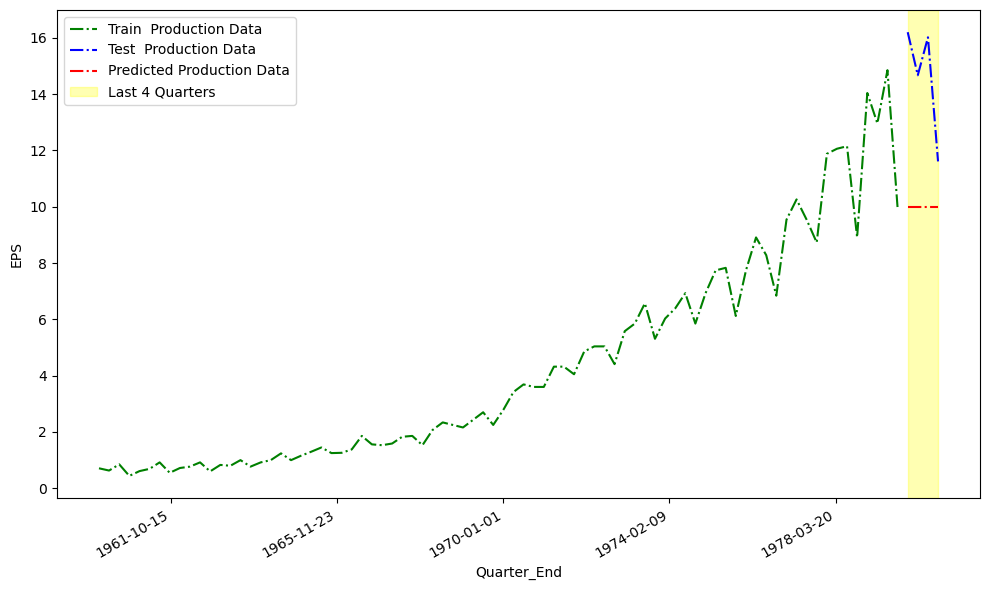

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['EPS'],'g-.', label="Train  Production Data")
ax.plot(test.index, test['EPS'],'b-.', label="Test  Production Data")
ax.plot(test.index, test['pred_last'],'r-.', label="Predicted Production Data")

ax.set_xlabel('Quarter_End')
ax.set_ylabel('EPS')

# Highlight the last four quarters
start_highlight = df.index[-4]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 4 Quarters")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

# Naive seasonal forecast


In [27]:
train.tail()

,EPS
Quarter,
1978-10-01,8.91
1979-01-01,14.04
1979-04-02,12.96
1979-07-02,14.85
1979-10-01,9.99


In [28]:
test.loc[:, 'pred_last_season'] = train['EPS'][-4:].values

test

,EPS,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
Quarter,,,,,
1980-01-01,16.20,4.3085,12.96,9.99,14.04
1980-04-01,14.67,4.3085,12.96,9.99,12.96
1980-07-02,16.02,4.3085,12.96,9.99,14.85
1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [29]:
mape_naive_seasonal = mape(test['EPS'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

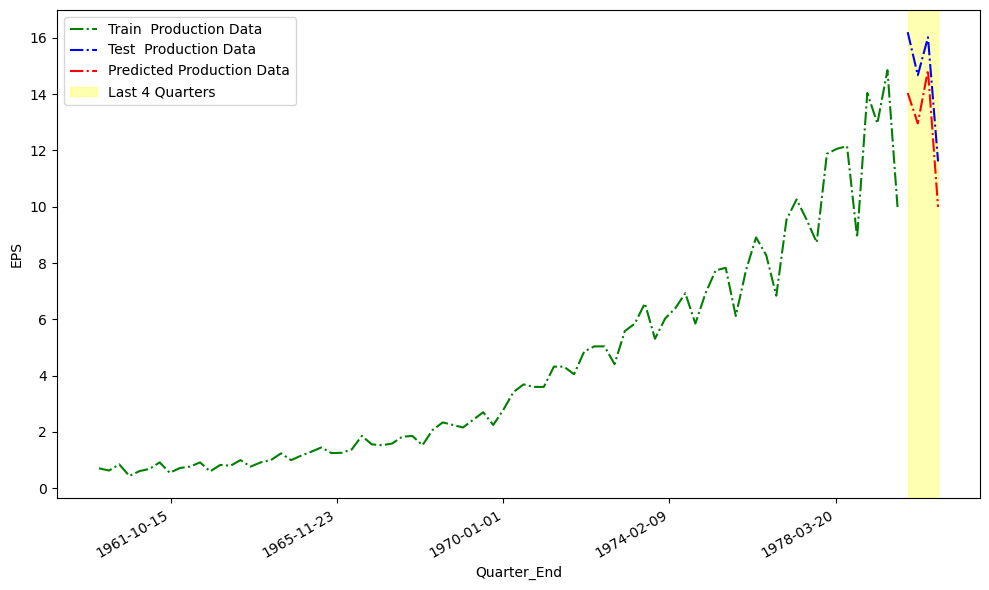

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the time series
ax.plot(train.index, train['EPS'],'g-.', label="Train  Production Data")
ax.plot(test.index, test['EPS'],'b-.', label="Test  Production Data")
ax.plot(test.index, test['pred_last_season'],'r-.', label="Predicted Production Data")

ax.set_xlabel('Quarter_End')
ax.set_ylabel('EPS')

# Highlight the last four quarters
start_highlight = df.index[-4]  
end_highlight = df.index[-1]  
ax.axvspan(start_highlight, end_highlight, color='yellow', alpha=0.3, label="Last 4 Quarters")

# Format x-ticks dynamically based on the range of data
ax.xaxis.set_major_locator(plt.MaxNLocator(6))  # Limit to 6 ticks for clarity
fig.autofmt_xdate()  # Auto-format dates for readability

# Tight layout for better spacing
plt.tight_layout()


# Show the plot
plt.legend()
plt.show()

# Baseline

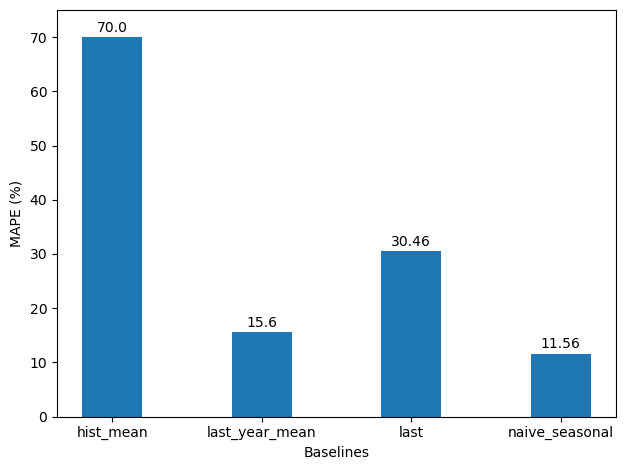

In [31]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

